In [1]:
!pip install rpy2
!apt-get -y update && apt-get install -y  libudunits2-dev libgdal-dev libgeos-dev libproj-dev
!sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable
!sudo apt-get update
!sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev 

!sudo apt update
!sudo apt-get install -y libmagick++-dev
!sudo apt install chromium-browser
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [816 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic

In [2]:
%%R 
install.packages('sf')
library(sf)
install.packages('plotly') 
install.packages('rgl')  
library(rgl)
library(tidyverse)

install.packages('webshot2')
install.packages('magick')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/proxy_0.4-27.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 74622 bytes (72 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [ ]:
%%R 
system("wget --continue https://github.com/JacekPardyak/tb-data-science-talks/raw/master/2022-06-30/tb-logo/logo.dxf -O /tmp/logo.dxf")
logo = st_read("/tmp/logo.dxf") %>%
  select(geometry) %>% mutate(nrow = 1:n())

# (t)eam.blue
l1 <- logo %>% slice(1:44) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc() %>% st_sf(geometry = .)
l1
l1 %>% ggplot() +
  geom_sf()

# team.bl(u)e
l2 <- logo %>% slice(45:92) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l2
l2 %>% ggplot() +
  geom_sf()

# team.b(l)ue
l3 <- logo %>% slice(93:104) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l3
l3 %>% ggplot() +
  geom_sf()

# t(e)am.blue
l4 <- logo %>% slice(105:179) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

p1 <- logo %>% slice(180) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()
p2 <- logo %>% slice(195) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()

tmp <- p1[1,] %>% rbind(p2[2,]) %>% st_linestring() %>% st_sfc() %>% st_sf(geometry = .)

tmp <- logo %>% slice(180:195) %>% bind_rows(tmp) %>%
    select(geometry) %>% st_union() %>% st_polygonize() %>% 
    first() %>% 
    first() %>% st_sfc()  %>% st_sf(geometry = .)
  
l4 <- l4 %>% st_difference(tmp)
  
l4 %>% ggplot() +
    geom_sf()  

# team.blu(e)
l5 <- logo %>% slice(196:270) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l5 %>% ggplot() +
  geom_sf()

p1 <- logo %>% slice(271) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()
p2 <- logo %>% slice(286) %>% select(geometry) %>% 
  first() %>% 
  first() %>% as.matrix()

tmp <- p1[1,] %>% rbind(p2[2,]) %>% st_linestring() %>% st_sfc()  %>% st_sf(geometry = .)
tmp <- logo %>% slice(271:286) %>% bind_rows(tmp) %>%
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

l5 <- l5 %>% st_difference(tmp)

l5 %>% ggplot() +
  geom_sf()

# tea(m).blue
l6 <- logo %>% slice(287:379) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l6
l6 %>% ggplot() +
  geom_sf()

# team(.)blue
l7 <- logo %>% slice(380:412) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l7
l7 %>% ggplot() +
  geom_sf()

# te(a)m.blue
l8 <- logo %>% slice(413:474) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l8 %>% ggplot() +
  geom_sf()

tmp <- logo %>% slice(475:507) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

l8 <- l8 %>% st_difference(tmp)
l8 %>% ggplot() +
  geom_sf()

# team.(b)lue
l9 <- logo %>% slice(508:564) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)

tmp <- logo %>% slice(565:597) %>% 
  select(geometry) %>% st_union() %>% st_polygonize() %>% 
  first() %>% 
  first() %>% st_sfc()  %>% st_sf(geometry = .)
l9 <- l9 %>% st_difference(tmp)

l9 %>% ggplot() +
    geom_sf()
  
# write shape
data <- l1 %>% 
  bind_rows(l4) %>% 
  bind_rows(l8) %>%
  bind_rows(l6) %>%
  bind_rows(l7) %>%
  bind_rows(l9) %>%
  bind_rows(l3) %>%
  bind_rows(l2) %>%
  bind_rows(l5)

st_write(data, "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/logo.shp", append=FALSE)

Reading layer `entities' from data source `/tmp/logo.dxf' using driver `DXF'
Simple feature collection with 597 features and 6 fields
Geometry type: LINESTRING
Dimension:     XY
Bounding box:  xmin: 15.8276 ymin: 12.72794 xmax: 292.4652 ymax: 61.2117
CRS:           NA
Writing layer `logo' to data source 
  `/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/logo.shp' using driver `ESRI Shapefile'
Writing 9 features with 0 fields and geometry type Polygon.


In [ ]:
%%R
data = st_read("/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/logo.shp") 
grid_spacing = 1
grid <- st_make_grid(data, what = "centers", cellsize = c(grid_spacing, grid_spacing), offset = c(1, 1)) %>%
  st_sf() %>% st_join(data)
surface <- grid %>% st_coordinates() %>% as_tibble() %>% bind_cols(grid %>% st_drop_geometry()) %>%
 rename(Z = FID) %>% mutate(Z = ifelse(is.na(Z), 0, 10)) %>% pivot_wider(names_from = Y, values_from = Z) %>%
 column_to_rownames("X") %>% as.matrix()
save(surface, file = "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/surface.RData")

Reading layer `logo' from data source 
  `/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/logo.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 9 features and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 15.8276 ymin: 12.72794 xmax: 292.4652 ymax: 61.2117
CRS:           NA


In [ ]:
%%R
load("/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/surface.RData")
z <- surface        # Exaggerate the relief
x <- as.numeric(rownames(surface))
y <- as.numeric(colnames(surface))
zlim <- range(z, na.rm = T)
zlen <- zlim[2] - zlim[1] + 1
colorlut <- terrain.colors(zlen) # height color lookup table
col <- colorlut[ z - zlim[1] + 1 ] # assign colors to heights for each point
open3d()
surface3d(x, y, z, color = col, back = "lines")
htmlwidgets::saveWidget(rglwidget(width = 1000, height = 1000), 
                        file = "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/surface.html",
                        libdir = "libsR",
                        selfcontained = TRUE
                        )
close3d() 

In [ ]:
%%R
library(rgl)
library(magick)

mycolors <- c('royalblue1', 'darkcyan', 'oldlace')
iris$color <- mycolors[ as.numeric(iris$Species) ]

# Static chart
plot3d( iris[,1], iris[,2], iris[,3], col = iris$color, type = "s", radius = .2 )

# We can indicate the axis and the rotation velocity
play3d( spin3d( axis = c(0, 0, 1), rpm = 20), duration = 10 )

# Save like gif
movie3d(
  movie="3dAnimatedScatterplot", 
  spin3d( axis = c(0, 0, 1), rpm = 7),
  duration = 10, 
  dir = "/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/",
  type = "gif", 
  clean = TRUE
)

In [3]:
%%R 
rmarkdown::render('/content/drive/MyDrive/Colab Notebooks/tb-data-science-talks/2022-07-28/presentation/markdown.Rmd')

R[write to console]: 

processing file: markdown.Rmd



  |...                                                                   |   5%
  ordinary text without R code

  |.......                                                               |  10%
label: setup (with options) 
List of 1
 $ include: logi FALSE

  |..........                                                            |  14%
  ordinary text without R code

  |.............                                                         |  19%
label: unnamed-chunk-1 (with options) 
List of 2
 $ echo: logi TRUE
 $ eval: logi FALSE

  |.................                                                     |  24%
  ordinary text without R code

  |....................                                                  |  29%
label: unnamed-chunk-2 (with options) 
List of 2
 $ echo: logi FALSE
 $ eval: logi TRUE

  |.......................                                               |  33%
  ordinary text without R code

  |...........................                                         

R[write to console]: output file: markdown.knit.md




/usr/bin/pandoc +RTS -K512m -RTS markdown.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output markdown.html --self-contained --wrap none --variable widescreen --variable transition=0.4 --css styles.css --template /usr/lib/R/site-library/rmarkdown/rmd/ioslides/default.html --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpeDDXC8/rmarkdown-str3a2ad7d8d7.html --variable logo=logo.svg 
/usr/bin/pandoc +RTS -K512m -RTS markdown.knit.md --to ioslides_presentation.lua --from markdown+autolink_bare_uris+tex_math_single_backslash --output /tmp/RtmpeDDXC8/ioslides-output3a2624117a.html --wrap none --slide-level 2 


R[write to console]: 
Output created: markdown.html



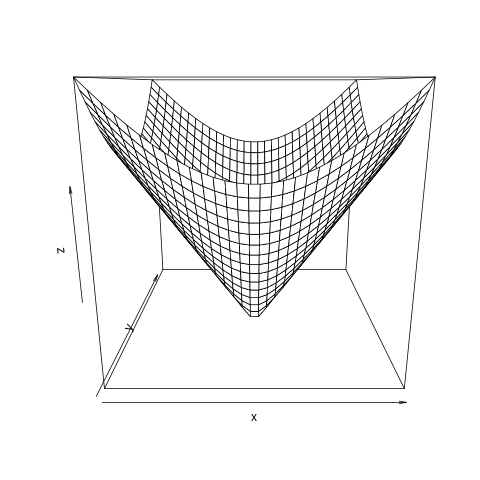

In [6]:
%%R
cone <- function(x, y){
sqrt(x ^ 2 + y ^ 2)
}
 
# prepare variables
x <- y <- seq(-1, 1, length = 30)
z <- outer(x, y, cone)
 
# plot the 3D surface
persp(x, y, z)